# Streaming Insights: Analyzing Viewership Trends on Netflix, Prime Video, Hulu, and Disney+

## Import the modules and libraries

In [1]:
 # Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer    
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn import preprocessing
from scipy.sparse import hstack
!pip install pandas_profiling
import pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 770.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1b8840d6f4dd7bc303fafec254105c5f806a54b5c673e

<ipython-input-1-bbb6eebb6fc5>:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [25]:
# I run it in google colab to speed up the process
# google drive setting
from google.colab import drive
drive.mount('/content/gdrive')
folder_name = '/content/gdrive/MyDrive/Colab Notebooks/NLP_projects/Recommendation system/'
file_name = 'MoviesOnStreamingPlatforms_updated.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
df = pd.read_csv(folder_name+file_name)
# remove the unnamed index column
df=df.iloc[:, 1:]
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Data attributes in details:
- **ID**: Unique ID for each record.
- **Title**: Name of the movie.
- **Year**: Release year of the movie.
- **Age**: Target age group for the movie.
- **IMDb**: IMDb rating of the movie.
- **Rotten Tomatoes**: Rotten Tomatoes rating percentage.
- **Netflix**: Whether the movie is available on Netflix.
- **Hulu**: Whether the movie is available on Hulu.
- **Prime Video**: Whether the movie is available on Prime Video.
- **Disney+**: Whether the movie is available on Disney+.
- **Type**: Movie or TV show.
- **Directors**: Name(s) of the director(s).
- **Genres**: Genre(s) of the movie.
- **Country**: Country of origin for the movie.
- **Language**: Language of origin for the movie.
- **Runtime**: Duration of the movie.



In [55]:
# show initial information about the datasets
# We can see there are some null values so it means that we have to something preprocessing later
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [56]:
print(df.Type)

0        0
1        0
2        0
3        0
4        0
        ..
16739    0
16740    0
16741    0
16742    0
16743    0
Name: Type, Length: 16744, dtype: int64


## Working with missing values
From `df.info()`, we can know that there are some missing values or null values, so we have to deal with it.

In [57]:
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
print("Total length is {}".format(len(df.ID)))
# create a new column
miss["missing_%"] = (miss.miss_count/len(df.ID))*100
miss

Total length is 16744


,miss_count,missing_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,9390,56.079790
IMDb,571,3.410177
Rotten Tomatoes,11586,69.194935
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


Age and rotten tomattoes have lots of missing values, So , we will handle the missing values in the following steps:
1. Drop missing values within age column
2. drop `nan` values in the following column
3. convert year column to the object

In [58]:
# Dropping values with missing % more than 50%
df.drop(['Rotten Tomatoes', 'Age'], axis = 1, inplace=True)
# Dropping Na's from the following columns
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 'Language', 'Runtime'],inplace=True)
df.reset_index(inplace=True,drop=True)
# Converting into object type
df.Year = df.Year.astype("object")
df.ID = df.ID.astype("object")

In [59]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15233 entries, 0 to 15232
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15233 non-null  object 
 1   Title        15233 non-null  object 
 2   Year         15233 non-null  object 
 3   IMDb         15233 non-null  float64
 4   Netflix      15233 non-null  int64  
 5   Hulu         15233 non-null  int64  
 6   Prime Video  15233 non-null  int64  
 7   Disney+      15233 non-null  int64  
 8   Type         15233 non-null  int64  
 9   Directors    15233 non-null  object 
 10  Genres       15233 non-null  object 
 11  Country      15233 non-null  object 
 12  Language     15233 non-null  object 
 13  Runtime      15233 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


## distribution plots

In [60]:
df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


<ipython-input-61-0b28500534b8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'])


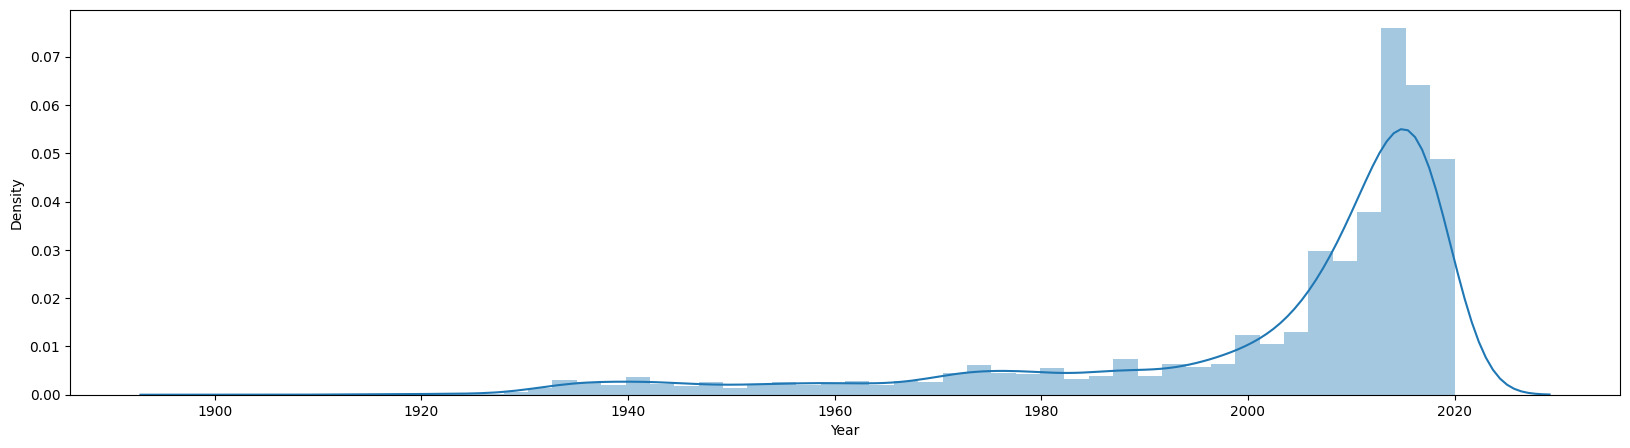

In [61]:
# Visualize the data to get better idea of the distribution
plt.figure(figsize=(20, 5))
sns.distplot(df['Year'])
plt.show()

So from the distribution, you can then see that most of movies are from 2000 to 2020.  
Let's then check another column, such as Rotten Tomatoes

<ipython-input-62-753b85666a4a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['IMDb'])


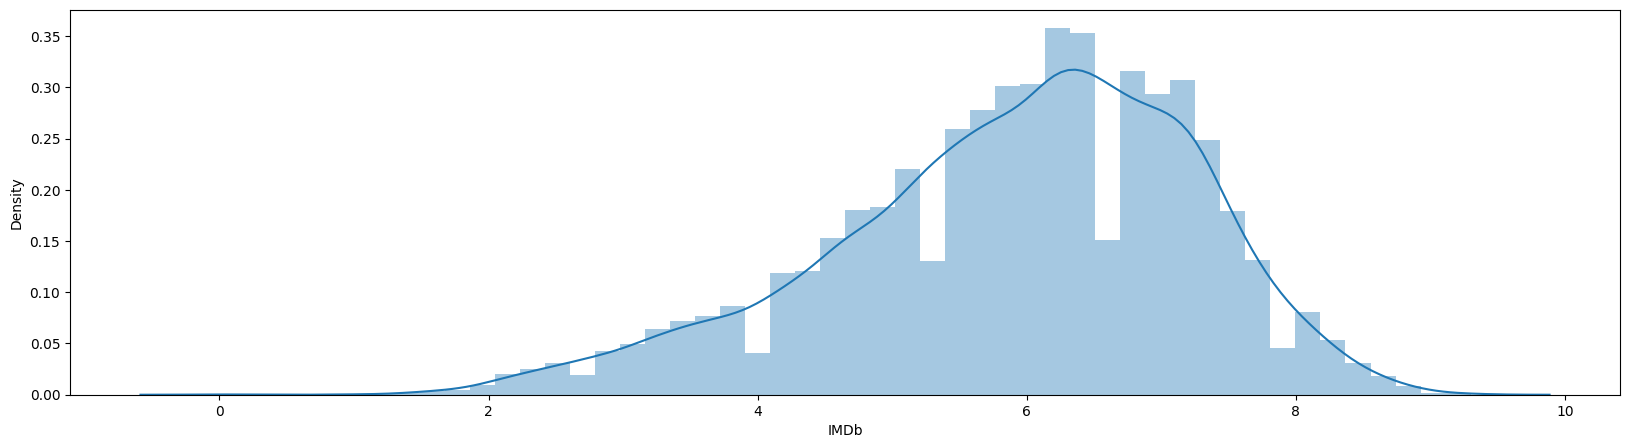

<ipython-input-62-753b85666a4a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Runtime'])


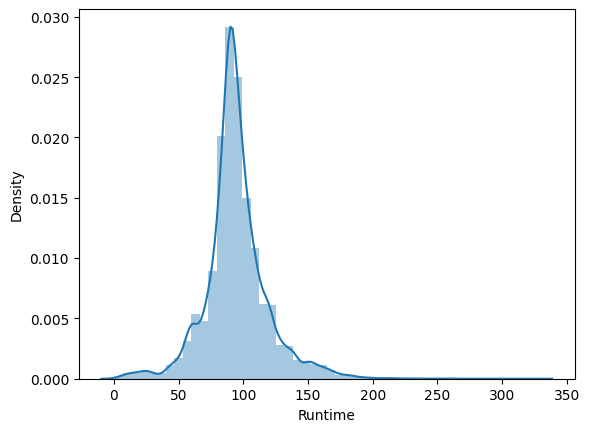

In [62]:
# Distribution of IMDb Rating
plt.figure(figsize=(20,5))
sns.distplot(df['IMDb'])
plt.show()

# Distribution of runtime
sns.distplot(df['Runtime'])
plt.show()


Rating distribution



## Distribution of Movies on each Streaming Platform


In [63]:
# A function to calculate the movies in different Streaming platforms
def m_cnt(plat, count=False):
    if count==False:
        print('Platform {} Count: {}'. format(plat, df[plat].sum()))
    else:
        return df[plat].sum()


In [64]:
# Let's see count of movies/shows of each streaming platform
m_cnt('Netflix')
m_cnt('Hulu')
m_cnt('Prime Video')
m_cnt('Disney+')


Platform Netflix Count: 3152
Platform Hulu Count: 848
Platform Prime Video Count: 11289
Platform Disney+ Count: 542


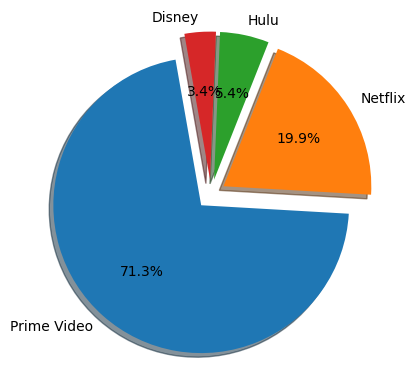

[11289, 3152, 848, 542]


In [65]:

# Movies on each platform
lab = 'Prime Video','Netflix', 'Hulu', 'Disney'
s = [m_cnt('Prime Video', count=True),
     m_cnt('Netflix', count=True),
     m_cnt('Hulu', count=True),
     m_cnt('Disney+', count=True)]

explode = (0.1, 0.1, 0.1, 0.1)

#plotting
fig1, ax1 = plt.subplots()
ax1.pie(s,
       labels = lab,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 100)

ax1.axis = ('equal')
plt.show()
print(s)

## Build your own recommendation system

Generally, these are math-based frameworks focusing on suggesting products/services to end-users that are relevant to their needs and wants. For example, __movies to watch__, __articles to read__, __products to buy__, music to listen to, or anything depending on the domain. There are majorly three methods to build Recommender Systems:

- **Content-Based Methods**: Define a model for users or items based on their interactions and recommend other similar items to the users using item feature sets.
- **Collaborative Filtering Methods**: Define a model for users and items based on their interaction similarity scores or user-user similarity scores, which are then used for item recommendation.
- **Hybrid Methods**: Combine content-based and collaborative filtering methods to achieve better results.

We will build recommendation system based on the cosine similarity

### step1 Select the numerical variable

```
# This is formatted as code
```




In [66]:
# only selected float and int number
ndf = df.select_dtypes(include=['float64',"int64"]) 
ndf

,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,8.8,1,0,0,0,0,148.0
1,8.7,1,0,0,0,0,136.0
2,8.5,1,0,0,0,0,149.0
3,8.5,1,0,0,0,0,116.0
4,8.8,1,0,1,0,0,161.0
...,...,...,...,...,...,...,...
15228,5.9,0,0,0,1,0,60.0
15229,6.2,0,0,0,1,0,89.0
15230,5.0,0,0,0,1,0,72.0
15231,6.2,0,0,0,1,0,120.0


### step2: Scaling the numerical variable using a min-max scaler to reduce model complexity and training time

In [67]:
#importing minmax scaler
from sklearn import preprocessing

# Create MinMaxScaler Object and do the (0~1) normalization
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Create dataframe after transformation
ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))

# assign column names
ndfmx.columns=ndf.columns

# Show initial 5 records
ndfmx.head()


,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,0.946237,1.0,0.0,0.0,0.0,0.0,0.449541
1,0.935484,1.0,0.0,0.0,0.0,0.0,0.412844
2,0.913978,1.0,0.0,0.0,0.0,0.0,0.452599
3,0.913978,1.0,0.0,0.0,0.0,0.0,0.351682
4,0.946237,1.0,0.0,1.0,0.0,0.0,0.489297


### Step 3: Compute similarity score using [cosine similarity](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity)


In [68]:
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity
sig = cosine_similarity(ndfmx, ndfmx)

# Reverse mapping of indices and movie titles
# drop_duplicates() when there is duplicate number inside the list
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()


In [69]:
sig.shape

(15233, 15233)

In [70]:
def plot_scores(scores, titles):
    """
    Plots similarity scores.
    Args:
    scores (list): List of similarity scores.
    titles (list): List of movie titles.
    """
    plt.figure(figsize=(12, 6))
    plt.barh(titles, scores, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.ylabel('Movie Titles')
    plt.title('Similarity Scores of Recommended Movies')
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
    plt.show()

def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Similarity scores for plotting
    scores = [i[1] for i in sig_scores]
    
    # Movie titles for plotting
    titles = df['Title'].iloc[movie_indices]

    # Plot scores
    plot_scores(scores, titles)

    # Return the top 10 most similar movies
    return titles




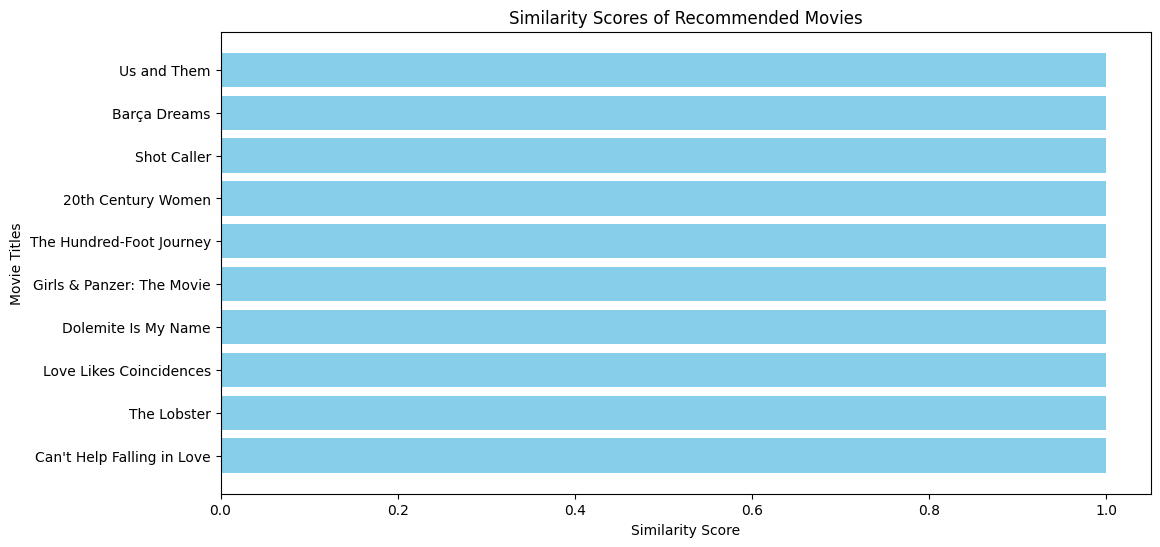

345                    Us and Them
1865                  Barça Dreams
183                    Shot Caller
202             20th Century Women
232       The Hundred-Foot Journey
1703     Girls & Panzer: The Movie
88             Dolemite Is My Name
983        Love Likes Coincidences
109                    The Lobster
966     Can't Help Falling in Love
Name: Title, dtype: object

In [71]:
# Execute get_rec() function for getting recommendation
give_rec("Okja", sig = sig)

Certainly this is not a very good results and it's not promising. Let's try to include other text information



[data](https://www.kaggle.com/code/nhatlinhtran/the-hottest-topics-in-machine-learning/input?select=papers.csv)

## Using numerical and textual columns

In [72]:
df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [83]:
#the function performs all the important preprocessing steps
def preprocess(df):

    #combining all text columns
    # Selecting all object data type and storing them in list
    s = list(df.select_dtypes(include=['object']).columns)
    # Removing ID and Title column
    s.remove("Title")
    s.remove("ID")
    # Joining all text/object columns using commas into a single column
    df['all_text']= df[s].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

    # Creating a tokenizer to remove unwanted elements from our data like symbols and numbers
    token = RegexpTokenizer(r'[a-zA-Z]+')

    # Converting TfidfVector from the text
    cv = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
    text_counts= cv.fit_transform(df['all_text'])
    print(text_counts.shape)
    # Aelecting numerical variables
    ndf = df.select_dtypes(include=['float64',"int64"])

    # Scaling Numerical variables
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

    # Applying scaler on our data and converting i into a data frame
    ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))
    ndfmx.columns=ndf.columns    

    # Adding our adding numerical variables in the TF-IDF vector
    # reshape it into 2D array
    IMDb = ndfmx.IMDb.values[:, None]
    X_train_dtm = hstack((text_counts, IMDb))
    Netflix = ndfmx.Netflix.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Netflix))
    Hulu = ndfmx.Hulu.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Hulu))
    Prime = ndfmx["Prime Video"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Prime))
    Disney = ndfmx["Disney+"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Disney))
    Runtime = ndfmx.Runtime.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Runtime))
    return X_train_dtm


In [84]:
# Preprocessing data
mat =preprocess(df)
mat.shape


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(15233, 11991)


(15233, 11997)

In [79]:
# using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the sigmoid kernel
sig2 = cosine_similarity(mat, mat)

# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()


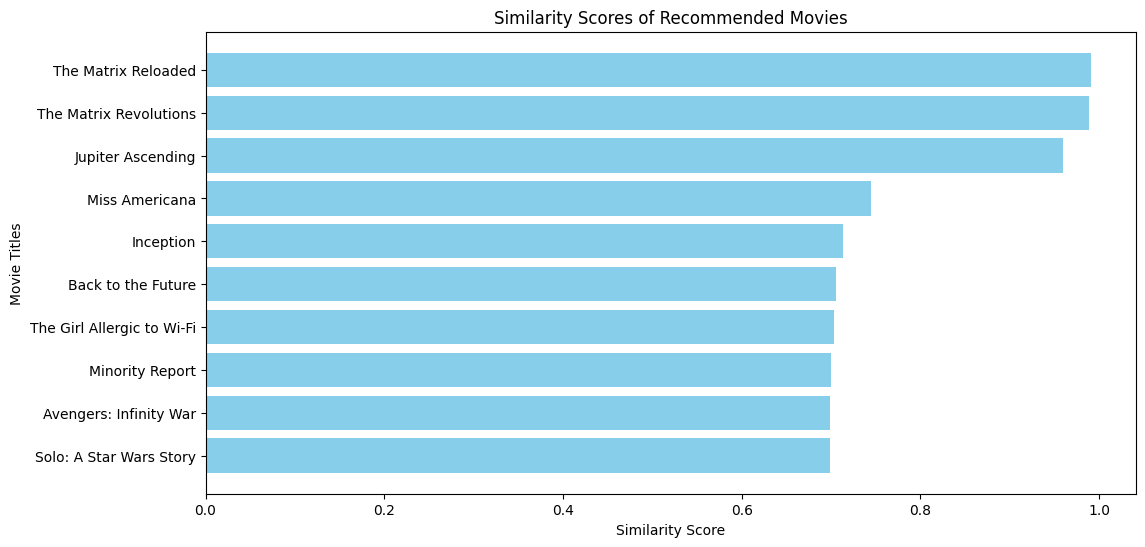

81             The Matrix Reloaded
245         The Matrix Revolutions
755              Jupiter Ascending
154                 Miss Americana
0                        Inception
3               Back to the Future
1971    The Girl Allergic to Wi-Fi
36                 Minority Report
2           Avengers: Infinity War
132        Solo: A Star Wars Story
Name: Title, dtype: object

In [80]:
give_rec("The Matrix",sig=sig2)



---

In this guide, you embarked on a comprehensive exploration of a movie dataset from various streaming services. This involved:

- Probing for missing data
- Creating unique distribution plots
- Examining the distribution of films across each streaming platform

Additionally, you delved into various factors including:

- Genre
- Country of origin
- Language
- IMDB ratings
- Film duration

To cap it off, you learned how to construct a movie recommendation system using Python, providing you with practical experience in building a real-world application.

---


